In [ ]:
# 1. 라이브러리 설치
!pip install -q ultralytics

import os
import yaml
from ultralytics import YOLO

# GPU 연결 확인
import torch
print(f"사용 가능 GPU: {torch.cuda.get_device_name(0)}" if torch.cuda.is_available() else "GPU를 사용할 수 없습니다.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 41.9 MB/s eta 0:00:00
사용 가능 GPU: NVIDIA A100-SXM4-40GB


In [ ]:
!pip install -q roboflow
from roboflow import Roboflow

# 'YOUR_PRIVATE_API_KEY' 부분에 복사한 키를 넣으세요.
rf = Roboflow(api_key="XP9FR6mmdfoonxa9DE34")

project = rf.workspace("test-wrkdf").project("bdd100k-finetune")
version = project.version(3)
dataset = version.download("yolov11")

print(f"✅ 다운로드 완료! 경로: {dataset.location}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bdd100k-finetune-3 in yolov11:: 100%|██████████| 63810/63810 [00:06<00:00, 9362.49it/s] 


✅ 다운로드 완료! 경로: /content/bdd100k-finetune-3


In [ ]:
#wandb 연결
# 1. 라이브러리 설치
!pip install -q wandb

# 2. 로그인 (API 키 입력창이 뜨면 본인의 WandB 키를 붙여넣으세요)
import wandb
wandb.login()

invalid escape sequence '\/'
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 wandb_v1_WZTc8atea4izgyccbeFL1zWLdsd


wandb: WARNING Invalid choice
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Find your API key here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: ERROR Invalid API key: API key must have 40+ characters, has 36.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 4cb71fff5d2364f9edf5


wandb: WARNING Invalid choice
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Find your API key here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: ERROR Invalid API key: API key must have 40+ characters, has 20.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Find your API key here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: gksqkf0824 (gksqkf0824-kyonggi-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
import wandb
from ultralytics import YOLO

# 1. WandB 초기화 (이름을 'Baseline_Final_Report' 식으로 지으세요)
run = wandb.init(project="BDD100K_Night_Project", name="Baseline_Final_Report")

# 2. 이미 학습된 'best' 모델 로드
model = YOLO('/content/BDD100K_Night_Baseline/v11s_base_e20/weights/best.pt')

# 3. 테스트 데이터로 검증 실행 (이때 자동으로 WandB에 업로드됨)
results = model.val(data='/content/datasets/data.yaml', split='test')

# 4. 수동으로 지표 요약 올리기
wandb.log({
    "test/mAP50": results.box.map50,
    "test/precision": results.box.mp,
    "test/recall": results.box.mr
})

wandb.finish()

Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 903.6±233.0 MB/s, size: 25.8 KB)
val: Scanning /content/datasets/test/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 60/60 19.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.8it/s 2.2s
                   all         60        649      0.839      0.556      0.659      0.346
               Vehicle         60        635      0.806      0.623      0.749      0.424
            Pedestrian          9         14      0.872       0.49      0.569      0.269
Speed: 3.4ms preprocess, 6.8ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to /content/runs/detect/val4


In [ ]:
import os
import shutil

# 1. 기존에 잘못 생성된 datasets 폴더가 있다면 삭제 (비어있지 않을 수 있으므로)
if os.path.exists('/content/datasets'):
    shutil.rmtree('/content/datasets')

# 2. 로보플로우가 다운로드한 폴더 이름을 'datasets'로 변경
# 다운로드 경로가 '/content/bdd100k-finetune-3' 인 것을 확인했으므로:
shutil.move('/content/bdd100k-finetune-3', '/content/datasets')

print("✅ 폴더 이름 변경 완료: /content/datasets")

# 3. 내부 구조 확인 (train, valid, data.yaml이 있는지 확인)
print(os.listdir('/content/datasets'))

✅ 폴더 이름 변경 완료: /content/datasets
['train', 'README.dataset.txt', 'test', 'data.yaml', 'valid', 'README.roboflow.txt']


In [ ]:
import yaml

yaml_path = '/content/datasets/data.yaml'

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# 로보플로우에서 받은 yaml은 보통 경로가 'train/images' 식으로 되어있는데,
# 이를 코랩의 절대 경로로 바꿔줍니다.
data['train'] = '/content/datasets/train/images'
data['val'] = '/content/datasets/valid/images'
data['test'] = '/content/datasets/test/images'

with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print("📝 data.yaml 경로 수정 완료!")

📝 data.yaml 경로 수정 완료!


모델 수정중,,,, 아래부터 쭉 하는 중이애요

성능 베리굿 ........

라벨링, 데이터 증강,,,


In [ ]:
############################통합 라벨 중##########################################3
import os
import yaml

# 1. 새로운 클래스 정의 (OMOT 논문 방식)
# 0: Vehicle (차량), 1: Pedestrian (보행자)
mapping = {
    'car': 0, 'bus': 0, 'truck': 0, 'bike': 0, 'motor': 0,
    'person': 1, 'rider': 1
}

dataset_path = '/content/datasets'
label_dirs = ['train/labels', 'valid/labels', 'test/labels']

print("🔄 라벨 통합 작업 시작...")

for dtype in label_dirs:
    target_dir = os.path.join(dataset_path, dtype)
    if not os.path.exists(target_dir): continue

    for label_file in os.listdir(target_dir):
        if not label_file.endswith('.txt'): continue

        file_path = os.path.join(target_dir, label_file)
        new_lines = []

        with open(file_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.split()
                class_id = int(parts[0])

                # 현재 datasets/data.yaml의 names를 기반으로 매핑
                # (YOLOv11 다운로드 시 정의된 names index 활용)
                # 10: bike, 11: bus, 12: car, 13: motor, 14: person, 15: rider, 21: truck
                if class_id == 12: new_id = 0 # car
                elif class_id == 11: new_id = 0 # bus
                elif class_id == 21: new_id = 0 # truck
                elif class_id == 10: new_id = 0 # bike
                elif class_id == 13: new_id = 0 # motor
                elif class_id == 14: new_id = 1 # person
                elif class_id == 15: new_id = 1 # rider
                else: continue # 숫자 라벨 등 나머지는 제거

                new_lines.append(f"{new_id} {' '.join(parts[1:])}\n")

        # 수정된 내용 덮어쓰기
        with open(file_path, 'w') as f:
            f.writelines(new_lines)

# 2. data.yaml 수정
yaml_path = os.path.join(dataset_path, 'data.yaml')
new_yaml = {
    'train': '/content/datasets/train/images',
    'val': '/content/datasets/valid/images',
    'test': '/content/datasets/test/images',
    'nc': 2,
    'names': ['Vehicle', 'Pedestrian']
}

with open(yaml_path, 'w') as f:
    yaml.dump(new_yaml, f)

print("✅ 클래스 통합 완료! (Vehicle, Pedestrian)")

🔄 라벨 통합 작업 시작...
✅ 클래스 통합 완료! (Vehicle, Pedestrian)


In [ ]:
##########################라벨 통합이 온전한가?##################################33
import os
from collections import Counter

def check_label_stats(label_path):
    all_classes = []
    for file in os.listdir(label_path):
        if file.endswith('.txt'):
            with open(os.path.join(label_path, file), 'r') as f:
                for line in f:
                    all_classes.append(int(line.split()[0]))

    stats = Counter(all_classes)
    return stats

# Train 라벨 통계 확인
train_stats = check_label_stats('/content/datasets/train/labels')
print("📊 [Train 데이터 라벨 통계]")
print(f"  - Vehicle (Class 0): {train_stats[0]}개")
print(f"  - Pedestrian (Class 1): {train_stats[1]}개")
print(f"  - 기타 제거된 라벨: {sum(v for k, v in train_stats.items() if k not in [0, 1])}개")

# Valid 라벨 통계 확인
val_stats = check_label_stats('/content/datasets/valid/labels')
print("\n📊 [Valid 데이터 라벨 통계]")
print(f"  - Vehicle (Class 0): {val_stats[0]}개")
print(f"  - Pedestrian (Class 1): {val_stats[1]}개")

📊 [Train 데이터 라벨 통계]
  - Vehicle (Class 0): 259411개
  - Pedestrian (Class 1): 19362개
  - 기타 제거된 라벨: 0개

📊 [Valid 데이터 라벨 통계]
  - Vehicle (Class 0): 41223개
  - Pedestrian (Class 1): 3356개


In [ ]:
# Super Resolution에 필요한 모델 다운로드 (EDSR_x2.pb)
# x2는 해상도를 가로세로 2배씩 늘린다는 의미입니다.
!wget -O EDSR_x2.pb https://github.com/Saafke/EDSR_Tensorflow/raw/master/models/EDSR_x2.pb

# OpenCV contrib 패키지 확인 (보통 Colab에는 설치되어 있으나 확인차)
!pip install opencv-contrib-python -q

--2026-01-14 01:30:07--  https://github.com/Saafke/EDSR_Tensorflow/raw/master/models/EDSR_x2.pb
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Saafke/EDSR_Tensorflow/master/models/EDSR_x2.pb [following]
--2026-01-14 01:30:07--  https://raw.githubusercontent.com/Saafke/EDSR_Tensorflow/master/models/EDSR_x2.pb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38490162 (37M) [application/octet-stream]
Saving to: ‘EDSR_x2.pb’

EDSR_x2.pb          100%[===================>]  36.71M   189MB/s    in 0.2s    

2026-01-14 01:30:08 (189 MB/s) - ‘EDSR_x2.pb’ saved [38490162/38490162]



In [ ]:
# 기존 opencv 패키지 충돌 방지를 위해 삭제
!pip uninstall opencv-python opencv-python-headless opencv-contrib-python -y

# Super Resolution 기능이 포함된 contrib 버전 설치
!pip install opencv-contrib-python

Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88
Found existing installation: opencv-contrib-python 4.12.0.88
Uninstalling opencv-contrib-python-4.12.0.88:
  Successfully uninstalled opencv-contrib-python-4.12.0.88
  Using cached opencv_contrib_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
Using cached opencv_contrib_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (73.2 MB)


In [ ]:
import cv2
from cv2 import dnn_superres

# 오류가 해결되었는지 확인 (객체가 생성되면 성공)
sr = dnn_superres.DnnSuperResImpl_create()
print("✅ Super Resolution 모듈 로드 성공!")

✅ Super Resolution 모듈 로드 성공!


In [ ]:
pip install super_image -q

In [ ]:
import os
import glob
from collections import Counter

def count_yolo_instances(label_path, class_names):
    """
    YOLO 라벨 폴더를 탐색하여 클래스별 인스턴스 개수를 카운트합니다.
    """
    # 폴더 내 모든 .txt 파일 찾기
    label_files = glob.glob(os.path.join(label_path, "*.txt"))

    total_counts = Counter()

    for file in label_files:
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                if line.strip():
                    # YOLO 포맷: <class_id> <x> <y> <w> <h>
                    class_id = int(line.split()[0])
                    total_counts[class_id] += 1

    print(f"\n[결과] 경로: {label_path}")
    print("-" * 30)
    for class_id, count in sorted(total_counts.items()):
        name = class_names.get(class_id, f"Unknown({class_id})")
        print(f"Class {class_id} ({name}): {count}개")
    print("-" * 30)
    print(f"총 인스턴스 수: {sum(total_counts.values())}개")
    print(f"총 라벨 파일 수: {len(label_files)}개")

# 1. 클래스 맵핑 정의 (사용자님의 설정에 맞게 수정하세요)
# 12->2로 줄이셨다고 했으므로, 변환 후의 ID(0, 1 등)를 입력하거나
# 변환 전의 원본 ID를 확인하고 싶다면 12개 이름을 다 넣으시면 됩니다.
my_classes = {
    0: "Vehicle",
    1: "Pedestrian"
}

# 2. 데이터셋 경로 설정 (BDD100K 경로)
dataset_root = "/content/datasets"  # 실제 경로로 수정
sub_dirs = ['train/labels', 'valid/labels', 'test/labels']

for sub in sub_dirs:
    full_path = os.path.join(dataset_root, sub)
    if os.path.exists(full_path):
        count_yolo_instances(full_path, my_classes)
    else:
        print(f"경로를 찾을 수 없습니다: {full_path}")


[결과] 경로: /content/datasets/train/labels
------------------------------
Class 0 (Vehicle): 259411개
Class 1 (Pedestrian): 19362개
------------------------------
총 인스턴스 수: 278773개
총 라벨 파일 수: 27445개

[결과] 경로: /content/datasets/valid/labels
------------------------------
Class 0 (Vehicle): 41223개
Class 1 (Pedestrian): 3356개
------------------------------
총 인스턴스 수: 44579개
총 라벨 파일 수: 4394개

[결과] 경로: /content/datasets/test/labels
------------------------------
Class 0 (Vehicle): 635개
Class 1 (Pedestrian): 14개
------------------------------
총 인스턴스 수: 649개
총 라벨 파일 수: 60개


In [ ]:
# GPU 사용 SR

import os
import glob
import torch
from super_image import EdsrModel, ImageLoader
from PIL import Image
from tqdm import tqdm

# 1. GPU 사용 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"🚀 Using Device: {device}") # 'cuda'가 출력되어야 GPU를 쓰는 것입니다.

# 2. 모델 로드 (EDSR, x2)
# 처음 실행 시 모델 가중치를 자동으로 다운로드합니다.
model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)
model.to(device)
model.eval()

# 3. 데이터셋 경로 설정
dataset_root = '/content/datasets'
sub_dirs = ['train/images', 'valid/images', 'test/images']

print("🔄 GPU Super Resolution 시작...")

for sub_dir in sub_dirs:
    target_dir = os.path.join(dataset_root, sub_dir)
    if not os.path.exists(target_dir):
        continue

    image_paths = glob.glob(os.path.join(target_dir, '*.*'))
    print(f"📂 Processing {sub_dir} : {len(image_paths)} images")

    for img_path in tqdm(image_paths):
        try:
            # 이미지 로드
            image = Image.open(img_path).convert('RGB')

            # GPU로 전송 및 추론
            inputs = ImageLoader.load_image(image).to(device)
            with torch.no_grad(): # 그래디언트 계산 꺼서 메모리 아끼기
                preds = model(inputs)

            # 결과 저장 (덮어쓰기)
            ImageLoader.save_image(preds, img_path)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")

print("✅ GPU 기반 Super Resolution 변환 완료!")

🚀 Using Device: cuda
https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt
🔄 GPU Super Resolution 시작...
📂 Processing train/images : 27445 images


100%|██████████| 27445/27445 [35:07<00:00, 13.02it/s]


📂 Processing valid/images : 4394 images


100%|██████████| 4394/4394 [05:37<00:00, 13.02it/s]


📂 Processing test/images : 60 images


100%|██████████| 60/60 [00:04<00:00, 13.08it/s]

✅ GPU 기반 Super Resolution 변환 완료!


In [ ]:
import cv2
import numpy as np
import os
from tqdm import tqdm

def zero_dce_like_enhancement(img):
    # 0~1 정규화 및 다단계 커브 적용 (CLAHE 없이 노이즈 억제하며 밝기 강화)
    img_norm = img.astype(np.float32) / 255.0
    alpha = 0.4
    out = img_norm
    for _ in range(8):
        out = out + alpha * out * (1 - out)
    return (out * 255).astype(np.uint8)

# SR 처리된 기존 경로 -> 조도 개선된 새로운 경로
dataset_root = '/content/datasets'
enhanced_root = '/content/datasets_sr_enhanced'

for split in ['train', 'valid', 'test']:
    src_dir = os.path.join(dataset_root, split, 'images')
    dst_dir = os.path.join(enhanced_root, split, 'images')
    os.makedirs(dst_dir, exist_ok=True)

    if not os.path.exists(src_dir): continue

    img_names = os.listdir(src_dir)
    print(f"✨ Enhancing {split} images (SR+Zero-DCE)...")
    for name in tqdm(img_names):
        img = cv2.imread(os.path.join(src_dir, name))
        if img is not None:
            res = zero_dce_like_enhancement(img)
            cv2.imwrite(os.path.join(dst_dir, name), res)

# 💡 주의: labels 폴더도 새로운 경로(datasets_sr_enhanced)로 복사해주어야 합니다.
# !cp -r /content/datasets/train/labels /content/datasets_sr_enhanced/train/
# !cp -r /content/datasets/valid/labels /content/datasets_sr_enhanced/valid/
# !cp -r /content/datasets/test/labels /content/datasets_sr_enhanced/test/

✨ Enhancing train images (SR+Zero-DCE)...


100%|██████████| 27445/27445 [1:06:48<00:00,  6.85it/s]


✨ Enhancing valid images (SR+Zero-DCE)...


100%|██████████| 4394/4394 [10:40<00:00,  6.86it/s]


✨ Enhancing test images (SR+Zero-DCE)...


100%|██████████| 60/60 [00:08<00:00,  6.90it/s]


In [ ]:
# 1. 기존에 잘못 생성되었을 수 있는 빈 폴더들을 삭제 (깔끔한 복사를 위해)
!rm -rf /content/datasets_sr_enhanced/train/labels
!rm -rf /content/datasets_sr_enhanced/valid/labels
!rm -rf /content/datasets_sr_enhanced/test/labels

# 2. 폴더 자체를 대상 경로로 복사 (-a 옵션은 권한과 구조를 그대로 유지)
!cp -a /content/datasets/train/labels /content/datasets_sr_enhanced/train/
!cp -a /content/datasets/valid/labels /content/datasets_sr_enhanced/valid/
!cp -a /content/datasets/test/labels /content/datasets_sr_enhanced/test/

In [ ]:
import yaml
import os

# 데이터셋 경로 정의
dataset_path = '/content/datasets_sr_enhanced'
os.makedirs(dataset_path, exist_ok=True)

# yaml 설정 내용
data_config = {
    'train': os.path.join(dataset_path, 'train/images'),
    'val': os.path.join(dataset_path, 'valid/images'),
    'test': os.path.join(dataset_path, 'test/images'),
    'nc': 2,
    'names': ['Vehicle', 'Pedestrian']
}

# yaml 파일 저장
with open(os.path.join(dataset_path, 'data.yaml'), 'w') as f:
    yaml.dump(data_config, f)

print(f"✅ {os.path.join(dataset_path, 'data.yaml')} 생성 완료!")

✅ /content/datasets_sr_enhanced/data.yaml 생성 완료!


In [ ]:
from ultralytics import YOLO

# 1. 모델 로드
model = YOLO('yolo11s.pt')

# 2. 학습 설정 (SR+조도개선 데이터셋 사용)
results = model.train(
    data='/content/datasets_sr_enhanced/data.yaml', # 새로 만든 경로의 yaml
    epochs=20,
    imgsz=1280,            # [중요] SR 결과물에 맞게 1280 유지
    batch=16,              # 해상도가 커졌으므로 메모리 부족 시 8로 줄이세요
    optimizer='adamW',
    # 기존 AdamW 유지
    device=0,

    # --- 증강---
    mosaic=1.0,            # 작은 보행자 탐지력 강화
    mixup=0.15,            # 야간 조명 변화 일반화
    copy_paste=0.5,        # [핵심] 보행자 인스턴스 강제 복사로 불균형 해소

    # ---  튜닝 ---
    cls=2.5,               # 보행자(Class 1) 오답 시 패널티 2.5배 강화 (Recall 상승)
    box=7.5,               # 박스 정확도 유지

    project='bdd_night_final',
    name='sr_plus_zero_dce_v1'
)

New https://pypi.org/project/ultralytics/8.4.0 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.253 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=2.5, compile=False, conf=None, copy_paste=0.5, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets_sr_enhanced/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=sr_plus_zero_dc


--- Model Testing ---
Ultralytics 8.3.253 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2676.4±423.3 MB/s, size: 303.7 KB)
val: Scanning /content/datasets_sr_enhanced/test/labels... 60 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 60/60 1.3Kit/s 0.0s
val: New cache created: /content/datasets_sr_enhanced/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.1s/it 4.6s
                   all         60        649      0.818      0.553      0.705      0.364
               Vehicle         60        635      0.773       0.65      0.749      0.431
            Pedestrian          9         14      0.864      0.456      0.661      0.297
Speed: 17.7ms preprocess, 13.3ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to /content/runs

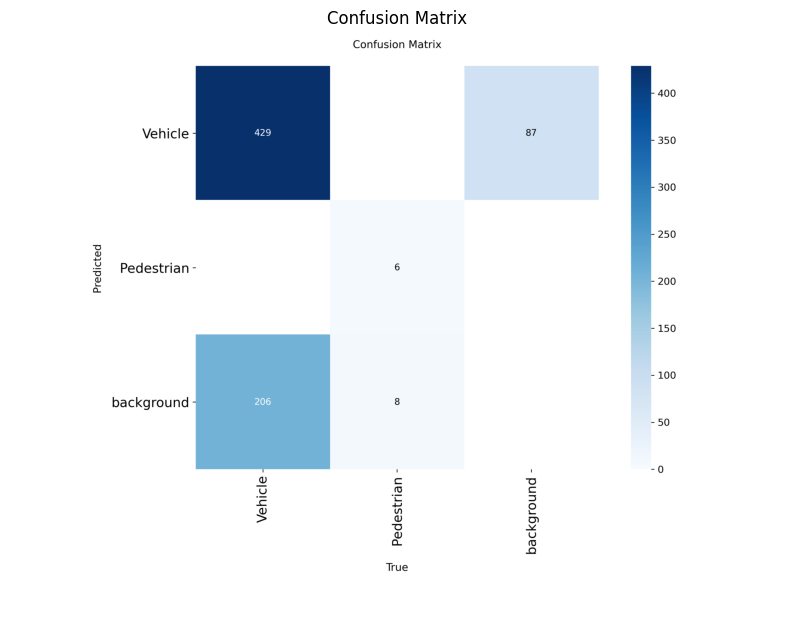

In [ ]:
print("\n--- Model Testing ---")
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import cv2

# 1. Load the best trained model
test_model = YOLO('/content/bdd_night_final/sr_plus_zero_dce_v16/weights/best.pt')

# 2. Evaluate the model on the test set
# plots=True: 그래프(PR Curve, Confusion Matrix 등) 저장 활성화
test_results = test_model.val(data='/content/datasets_sr_enhanced/data.yaml', split='test', plots=True)

print("✅ Model testing complete.")

# --- 3. 수치 결과 출력 (Recall, Precision, mAP) ---
print("\n[Evaluation Metrics]")
print(f"Mean Precision (mp): {test_results.box.mp:.4f}")
print(f"Mean Recall (mr):    {test_results.box.mr:.4f}")
print(f"mAP@50:              {test_results.box.map50:.4f}")
print(f"mAP@50-95:           {test_results.box.map:.4f}")

# --- 4. 시각화 결과 출력 (저장된 이미지 불러오기) ---
# val()이 결과를 저장한 경로 가져오기
save_dir = test_results.save_dir

def show_result_image(filename, title):
    path = os.path.join(save_dir, filename)
    if os.path.exists(path):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"⚠️ {filename} not found in {save_dir}")

print("\n--- Visualizations ---")
# 주요 그래프 시각화
show_result_image('PR_curve.png', 'Precision-Recall Curve') # PR 곡선
show_result_image('F1_curve.png', 'F1-Score Curve')         # F1 스코어 곡선
show_result_image('confusion_matrix.png', 'Confusion Matrix') # 혼동 행렬
# 필요하다면 P_curve.png (Precision), R_curve.png (Recall)도 추가 가능

In [ ]:
#####################GPU쓰는거 근데 난안씀###########################
# import torch
# import cv2
# import os
# import numpy as np
# from tqdm import tqdm

# # 1. GPU 장치 설정
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"🚀 Using Device: {device}")

# def zero_dce_gpu_enhancement(img_tensor):
#     """
#     PyTorch 텐서를 이용한 GPU 가속 조도 개선
#     """
#     alpha = 0.4
#     out = img_tensor
#     for _ in range(8):
#         out = out + alpha * out * (1 - out)
#     return out

# # 경로 설정
# dataset_root = '/content/datasets'
# enhanced_root = '/content/datasets_sr_enhanced'

# for split in ['train', 'valid', 'test']:
#     src_dir = os.path.join(dataset_root, split, 'images')
#     dst_dir = os.path.join(enhanced_root, split, 'images')
#     os.makedirs(dst_dir, exist_ok=True)
#     if not os.path.exists(src_dir): continue

#     img_names = os.listdir(src_dir)
#     print(f"✨ GPU Enhancing {split} images...")

#     for name in tqdm(img_names):
#         img = cv2.imread(os.path.join(src_dir, name))
#         if img is None: continue

#         # 1. 이미지를 GPU 텐서로 변환 (0~1 정규화 포함)
#         img_t = torch.from_numpy(img).to(device).float() / 255.0

#         # 2. GPU 연산 수행
#         with torch.no_grad():
#             enhanced_t = zero_dce_gpu_enhancement(img_t)

#         # 3. 다시 CPU로 가져와서 이미지 저장
#         enhanced_img = (enhanced_t.cpu().numpy() * 255).astype(np.uint8)
#         cv2.imwrite(os.path.join(dst_dir, name), enhanced_img)

In [ ]:
import ultralytics
from ultralytics import YOLO


# 1. 모델 로드
# rtdetr-l.pt (Large) 또는 rtdetr-x.pt (X-Large) 선택 가능
# 처음엔 coco 데이터로 사전학습된 가중치를 자동으로 다운로드합니다.
model = YOLO('yolo11m.pt')

# 2. 학습 시작
# data 인자에는 위에서 다운로드 받은 폴더 안의 'data.yaml' 경로를 넣으세요.
results = model.train(
    data='/content/datasets/data.yaml',
    epochs=20,
    imgsz=1280,            # [수정] SR로 이미지가 커졌으므로 입력 사이즈도 키워야 효과가 있습니다.
    batch=16,              # [수정] 해상도가 커지면 메모리를 많이 먹으므로 배치를 줄여야 할 수 있습니다 (32 -> 16 or 8)
    project='bdd_yolov11s_2labels',
    name='run_sr_x2',      # 실험 이름 변경 (구분하기 쉽게)
    device=0,
    optimizer='adamW'
)

Ultralytics 8.3.253 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run_sr_x2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

KeyboardInterrupt: 

In [ ]:
###############코드 모델링 선정 레츠고................... 수정#############################################################
from ultralytics import YOLO

# 1. 모델 체급 상향 (Nano -> Small)
# A100 GPU를 사용하므로 's' 모델도 매우 빠르게 학습됩니다.
model = YOLO('yolo11s.pt')

# 2. 성능 최적화 학습 실행
model.train(
    data='/content/datasets/data.yaml',
    epochs=50,           # 에포크를 늘려 충분히 학습 (A100 권장)
    imgsz=640,
    batch=32,             # A100 메모리를 활용하여 배치 사이즈 상향
    device=0,
    optimizer='AdamW',    # 야간 노이즈 환경에서 안정적인 수렴
    # --- 야간 특화 증강 (CCL 논문 아이디어 반영) ---
    hsv_v=0.6,            # 밝기 증강 강화
    mosaic=1.0,           # 작은 객체 탐지력 강화
    # -------------------------------------------
    project='BDD100K_Night_Final',
    name='v11s_merged_optimized'
)

Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.6, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=v11s_merged_optimized2, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspect

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ccaf8704620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

✅ 결과 탐색 경로: /content/BDD100K_Night_Final/v11s_merged_optimized2


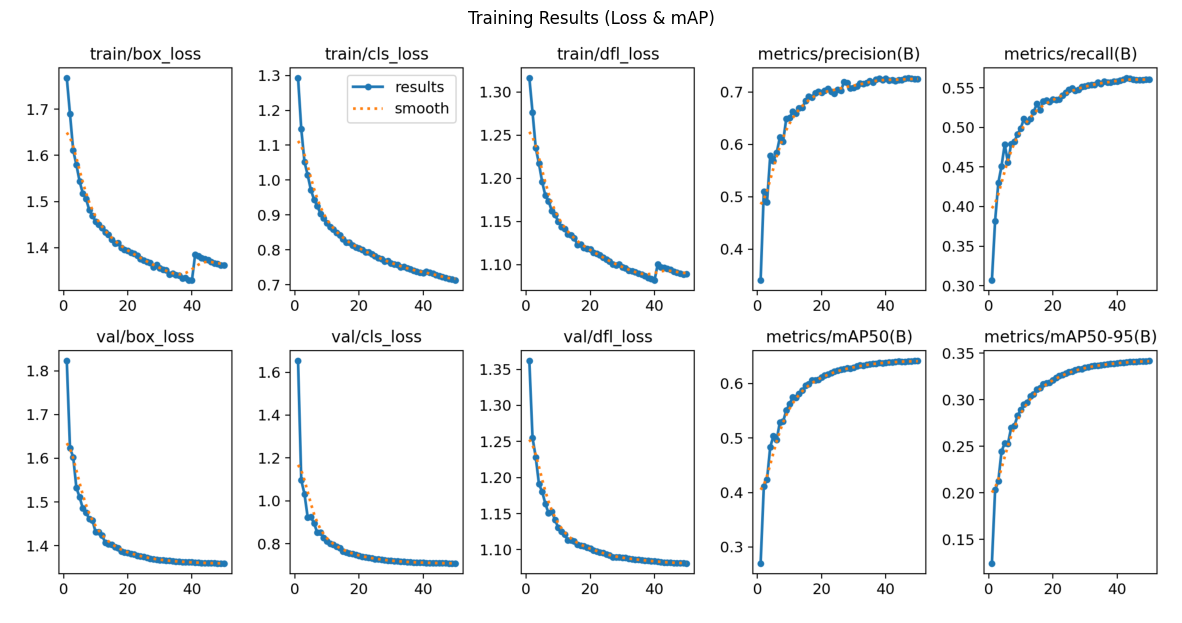


0: 640x640 10 Vehicles, 21.1ms
1: 640x640 11 Vehicles, 21.1ms
2: 640x640 13 Vehicles, 21.1ms
Speed: 1.6ms preprocess, 21.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict5

🚀 [실제 야간 도로 탐지 결과]


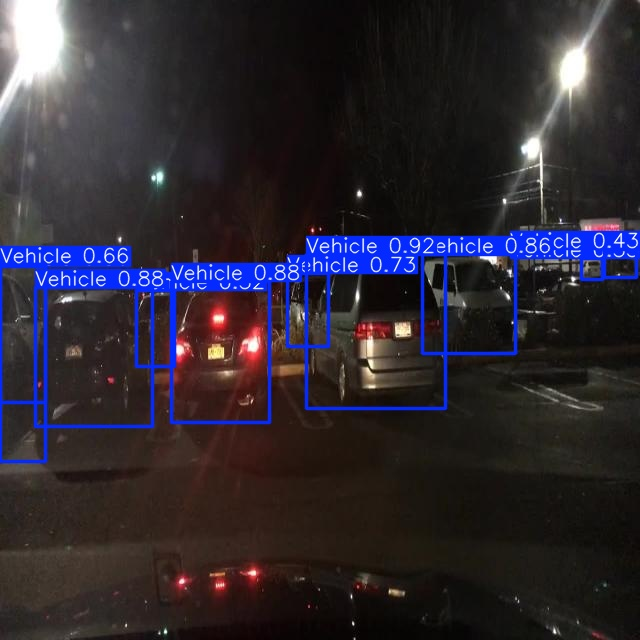

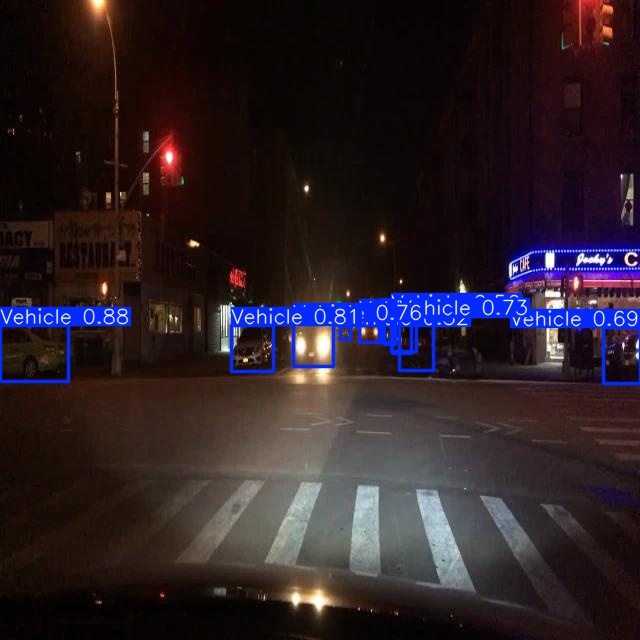

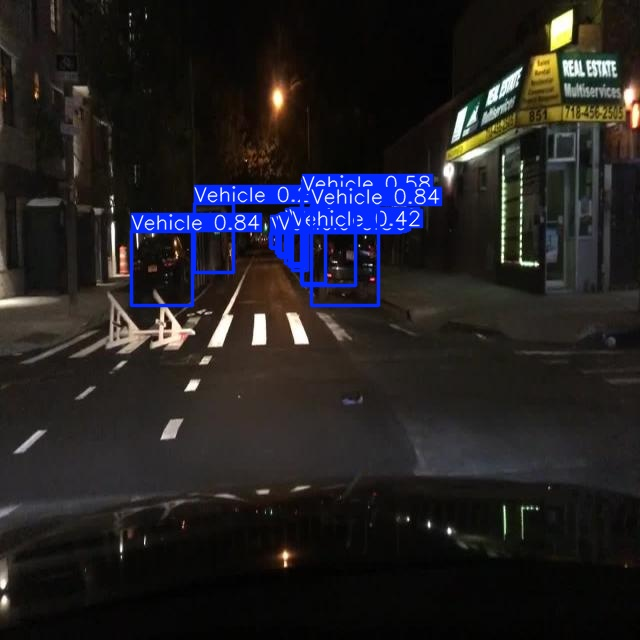

Mounted at /content/drive

✅ 구글 드라이브 저장 완료: /content/drive/MyDrive/BDD100K_Night_Project/Final_Result


In [ ]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2
import shutil
from google.colab import drive

# 1. 실제 학습 결과 폴더 자동 탐색
# 'BDD100K_Night_Final' 폴더 안에서 가장 최근에 생성된 폴더를 찾습니다.
search_path = '/content/BDD100K_Night_Final/v11s_merged_optimized*'
folders = sorted(glob.glob(search_path), key=os.path.getmtime)

if not folders:
    print("❌ 학습 결과 폴더를 찾을 수 없습니다. 학습이 정상적으로 시작되었는지 확인해주세요.")
else:
    results_dir = folders[-1]  # 가장 최신 폴더 선택
    print(f"✅ 결과 탐색 경로: {results_dir}")

    # 2. 학습 결과 그래프 시각화
    result_img = os.path.join(results_dir, 'results.png')
    if os.path.exists(result_img):
        img = mpimg.imread(result_img)
        plt.figure(figsize=(15, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Training Results (Loss & mAP)')
        plt.show()
    else:
        print("⚠️ results.png 파일을 아직 찾을 수 없습니다. 학습이 진행 중일 수 있습니다.")

    # 3. 모델 가중치(best.pt) 로드 및 테스트 이미지 시각화
    weights_path = os.path.join(results_dir, 'weights/best.pt')
    if os.path.exists(weights_path):
        best_model = YOLO(weights_path)

        # 테스트 이미지 3장 추론
        test_img_dir = '/content/datasets/test/images'
        test_images = [os.path.join(test_img_dir, img) for img in os.listdir(test_img_dir)[:3]]

        results = best_model.predict(source=test_images, save=True, conf=0.25)

        # 결과가 저장된 'predict' 폴더 찾기
        predict_folders = sorted(glob.glob('/content/runs/detect/predict*'), key=os.path.getmtime)
        latest_predict = predict_folders[-1]

        print("\n🚀 [실제 야간 도로 탐지 결과]")
        for img_name in os.listdir(latest_predict):
            img = cv2.imread(os.path.join(latest_predict, img_name))
            if img is not None:
                cv2_imshow(img)

        # 4. 구글 드라이브 영구 저장
        try:
            drive.mount('/content/drive', force_remount=True)
            save_path = '/content/drive/MyDrive/BDD100K_Night_Project/Final_Result'
            os.makedirs(save_path, exist_ok=True)

            shutil.copy(weights_path, f'{save_path}/best_model_v11s.pt')
            if os.path.exists(os.path.join(results_dir, 'results.csv')):
                shutil.copy(os.path.join(results_dir, 'results.csv'), f'{save_path}/results.csv')

            print(f"\n✅ 구글 드라이브 저장 완료: {save_path}")
        except Exception as e:
            print(f"❌ 드라이브 저장 중 오류 발생: {e}")
    else:
        print(f"⚠️ {weights_path} 파일이 없습니다. 학습이 아직 덜 끝났거나 에러가 났을 수 있습니다.")

위에 세개 모델 수정중 ,,,

계속 해야지! !

다시 시작하는 라벨링만 한 작업들 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ experience 4 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ다시레츠고

In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11s.pt')

# 2. 기본값 중심의 학습 실행
model.train(
    data='/content/datasets/data.yaml',
    epochs=20,            # 팀 협의사항 반영
    imgsz=640,            # 기본 해상도
    batch=32,             # A100 자원 활용
    device=0,
    optimizer='AdamW',     # 안정적인 학습을 위해 옵티마이저는 AdamW 유지 권장
    # --- 증강 및 특수 설정 제거 (기본값 사용) ---
    # hsv_v, scale, close_mosaic 등은 입력하지 않으면
    # YOLO의 기본 하이퍼파라미터값이 자동으로 적용됩니다.
    # ------------------------------------------
    project='BDD100K_Night_Baseline',
    name='v11s_base_e20'
)

Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=v11s_base_e20, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x782a5e76e300>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
# 1. 구글 드라이브 마운트 (연결)
from google.colab import drive
drive.mount('/content/drive')

# 2. 모델 파일을 내 드라이브로 복사 (폴더명은 자유롭게 수정)
import shutil
import os

save_path = '/content/drive/MyDrive/BDD100K_Project/models/'
os.makedirs(save_path, exist_ok=True)

# best.pt 복사
shutil.copy('/content/BDD100K_Night_Baseline/v11s_base_e20/weights/best.pt', save_path + 'v11s_night_best.pt')

print(f"✅ 모델이 구글 드라이브에 저장되었습니다: {save_path}")

Mounted at /content/drive
✅ 모델이 구글 드라이브에 저장되었습니다: /content/drive/MyDrive/BDD100K_Project/models/



--- Model Testing ---
Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1194.0±342.3 MB/s, size: 29.2 KB)
val: Scanning /content/datasets/test/labels... 60 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 60/60 1.5Kit/s 0.0s
val: New cache created: /content/datasets/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.6it/s 2.4s
                   all         60        649      0.839      0.556      0.659      0.346
               Vehicle         60        635      0.806      0.623      0.749      0.424
            Pedestrian          9         14      0.872       0.49      0.569      0.269
Speed: 3.6ms preprocess, 12.4ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to /content/runs/detect/val3
✅ Model testi

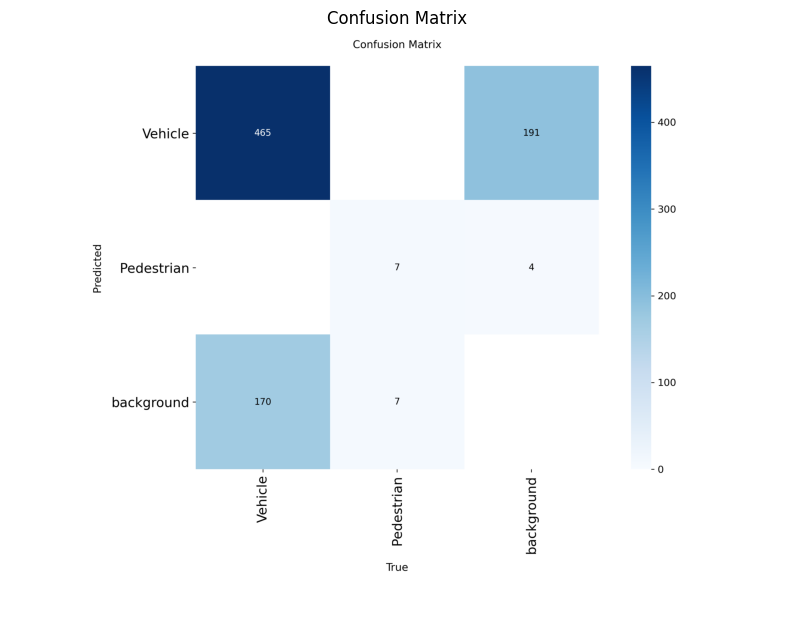

In [ ]:
print("\n--- Model Testing ---")
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import cv2

# 1. Load the best trained model
test_model = YOLO('/content/BDD100K_Night_Baseline/v11s_base_e20/weights/best.pt')

# 2. Evaluate the model on the test set
# plots=True: 그래프(PR Curve, Confusion Matrix 등) 저장 활성화
test_results = test_model.val(data='/content/datasets/data.yaml', split='test', plots=True)

print("✅ Model testing complete.")

# --- 3. 수치 결과 출력 (Recall, Precision, mAP) ---
print("\n[Evaluation Metrics]")
print(f"Mean Precision (mp): {test_results.box.mp:.4f}")
print(f"Mean Recall (mr):    {test_results.box.mr:.4f}")
print(f"mAP@50:              {test_results.box.map50:.4f}")
print(f"mAP@50-95:           {test_results.box.map:.4f}")

# --- 4. 시각화 결과 출력 (저장된 이미지 불러오기) ---
# val()이 결과를 저장한 경로 가져오기
save_dir = test_results.save_dir

def show_result_image(filename, title):
    path = os.path.join(save_dir, filename)
    if os.path.exists(path):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"⚠️ {filename} not found in {save_dir}")

print("\n--- Visualizations ---")
# 주요 그래프 시각화
show_result_image('PR_curve.png', 'Precision-Recall Curve') # PR 곡선
show_result_image('F1_curve.png', 'F1-Score Curve')         # F1 스코어 곡선
show_result_image('confusion_matrix.png', 'Confusion Matrix') # 혼동 행렬
# 필요하다면 P_curve.png (Precision), R_curve.png (Recall)도 추가 가능

In [ ]:
!pip install -q sahi
# 1. 라이브러리 강제 업데이트 및 설치
!pip install -U sahi ultralytics

✅ 드디어 모델 로드에 성공했습니다!


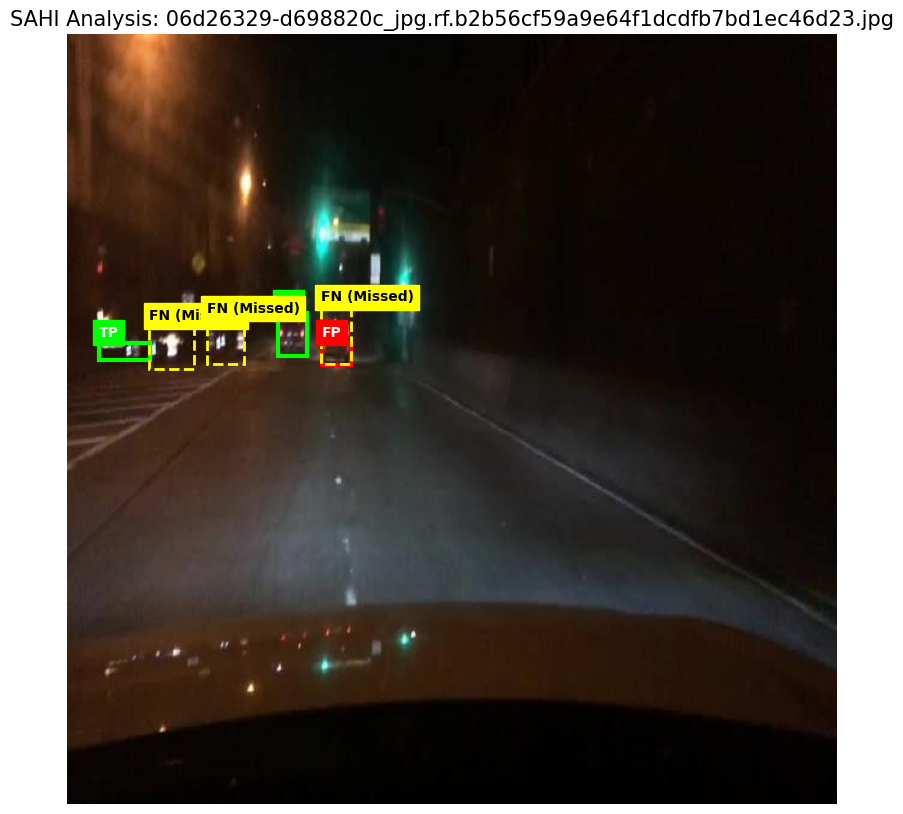

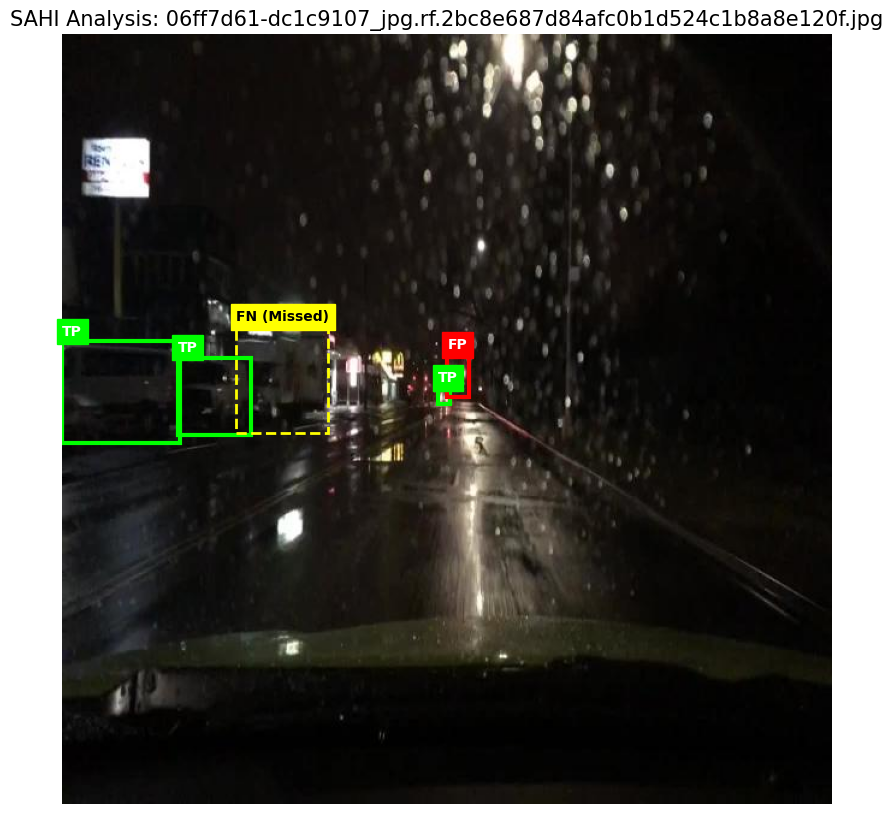

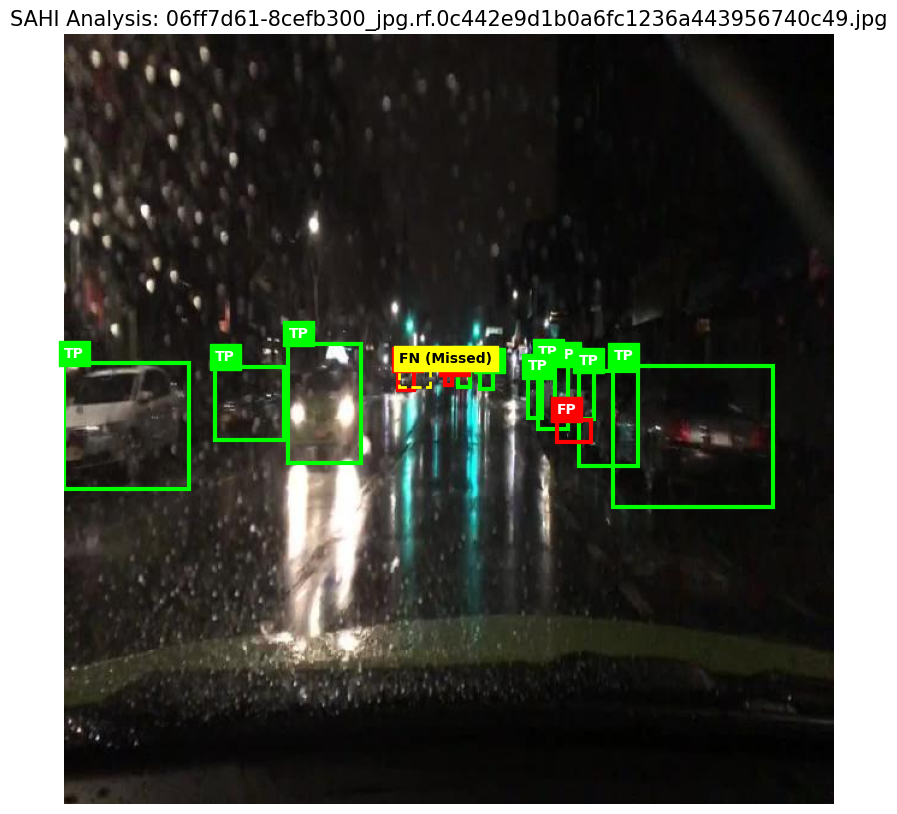

In [ ]:
from sahi.models.ultralytics import UltralyticsDetectionModel # 이름이 바뀌었습니다!
from sahi.predict import get_sliced_prediction
from ultralytics.utils.metrics import box_iou
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. 모델 로드 (UltralyticsDetectionModel 사용)
model_path = '/content/BDD100K_Night_Baseline/v11s_base_e20/weights/best.pt'

detection_model = UltralyticsDetectionModel(
    model_path=model_path,
    confidence_threshold=0.25,
    device='cuda:0' # A100 GPU 활용
)

print("✅ 드디어 모델 로드에 성공했습니다!")

# 2. 통합 테스트 및 시각화 함수 (이전과 로직 동일)
def test_and_visualize_sahi(img_path, label_path, iou_threshold=0.45):
    if not os.path.exists(img_path):
        print(f"❌ 이미지를 찾을 수 없습니다: {img_path}")
        return

    # 수정 제안 부분
    result = get_sliced_prediction(
        img_path,
        detection_model,
        slice_height=320,
        slice_width=320,
        overlap_height_ratio=0.2,
        overlap_width_ratio=0.2,
        postprocess_type='NMS',          # 중복 제거 알고리즘 추가 - 'nms' -> 'NMS'로 수정
        postprocess_match_threshold=0.5, # 중복 판정 기준 상향
        verbose=0
    )

    # 예측 박스 추출 (객체 리스트에서 xyxy 좌표만 가져옴)
    pred_boxes = [obj.bbox.to_xyxy() for obj in result.object_prediction_list]
    pred_boxes = torch.tensor(pred_boxes) if pred_boxes else torch.empty((0, 4))

    # 이미지 및 라벨 로드
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    gt_boxes = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.split()
                if len(parts) < 5: continue
                _, cx, cy, nw, nh = map(float, parts)
                gt_boxes.append([(cx-nw/2)*w, (cy-nh/2)*h, (cx+nw/2)*w, (cy+nh/2)*h])
    gt_boxes = torch.tensor(gt_boxes) if gt_boxes else torch.empty((0, 4))

    # 시각화 준비
    plt.figure(figsize=(15, 10))
    plt.imshow(img)
    ax = plt.gca()

    matched_gt = torch.zeros(len(gt_boxes), dtype=torch.bool)
    if len(pred_boxes) > 0 and len(gt_boxes) > 0:
        iou_matrix = box_iou(pred_boxes, gt_boxes)
        max_iou, max_idx = iou_matrix.max(1)

        for i, iou_val in enumerate(max_iou):
            box = pred_boxes[i].numpy()
            if iou_val >= iou_threshold:
                # TP (녹색)
                ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, color='lime', linewidth=3))
                ax.text(box[0], box[1]-5, 'TP', color='white', backgroundcolor='lime', fontsize=10, fontweight='bold')
                matched_gt[max_idx[i]] = True
            else:
                # FP (빨간색)
                ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, color='red', linewidth=3))
                ax.text(box[0], box[1]-5, 'FP', color='white', backgroundcolor='red', fontsize=10, fontweight='bold')

    # FN (노란색 점선)
    for i, box in enumerate(gt_boxes):
        if not matched_gt[i]:
            box = box.numpy()
            ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, color='yellow', linewidth=2, linestyle='--'))
            ax.text(box[0], box[1]-5, 'FN (Missed)', color='black', backgroundcolor='yellow', fontsize=10, fontweight='bold')

    plt.title(f"SAHI Analysis: {os.path.basename(img_path)}", fontsize=15)
    plt.axis('off')
    plt.show()

# 실행 (경로 확인 필수!)
test_img_dir = '/content/datasets/test/images'
test_lbl_dir = '/content/datasets/test/labels'

if os.path.exists(test_img_dir):
    sample_images = [f for f in os.listdir(test_img_dir) if f.endswith(('.jpg', '.png'))][:3]
    for img_name in sample_images:
        img_p = os.path.join(test_img_dir, img_name)
        lbl_p = os.path.join(test_lbl_dir, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))
        test_and_visualize_sahi(img_p, lbl_p)

In [ ]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sahi.models.ultralytics import UltralyticsDetectionModel
from sahi.predict import get_sliced_prediction
from ultralytics.utils.metrics import box_iou

# 1. 설정 및 경로
MODEL_PATH = '/content/BDD100K_Night_Baseline/v11s_base_e20/weights/best.pt'
TEST_IMG_DIR = '/content/datasets/test/images'
TEST_LBL_DIR = '/content/datasets/test/labels'
CONF_THRESHOLD = 0.25 # 베이스라인과 동일한 조건

# 2. 유틸리티 함수 (trapz 경고 해결)
def compute_ap(recall, precision):
    mrec = np.concatenate(([0.0], recall, [1.0]))
    mpre = np.concatenate(([1.0], precision, [0.0]))
    mpre = np.maximum.accumulate(mpre[::-1])[::-1]
    # np.trapz 대신 np.trapezoid 사용 (최신 numpy 대응)
    return np.trapezoid(mpre, mrec)

# 3. 모델 로드
detection_model = UltralyticsDetectionModel(
    model_path=MODEL_PATH,
    confidence_threshold=CONF_THRESHOLD,
    device='cuda:0'
)

stats = []
img_files = [f for f in os.listdir(TEST_IMG_DIR) if f.endswith(('.jpg', '.png'))]

print(f" 총 {len(img_files)}장의 이미지에 대해 SAHI 성능 평가를 시작합니다...")

# 4. 추론 루프 (에러 수정 완료)
for img_name in tqdm(img_files):
    img_path = os.path.join(TEST_IMG_DIR, img_name)
    lbl_path = os.path.join(TEST_LBL_DIR, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))

    # SAHI 슬라이싱 추론 (대문자 'NMS'로 수정)
    result = get_sliced_prediction(
        img_path,
        detection_model,
        slice_height=320,
        slice_width=320,
        overlap_height_ratio=0.2,
        overlap_width_ratio=0.2,
        postprocess_type='NMS',           # 'nms' -> 'NMS'로 수정 (ValueError 해결)
        postprocess_match_threshold=0.5,
        verbose=0
    )

    # 예측 데이터 추출 및 GPU -> CPU 이동
    p_boxes = torch.tensor([obj.bbox.to_xyxy() for obj in result.object_prediction_list])
    p_scores = torch.tensor([obj.score.value for obj in result.object_prediction_list])
    p_cls = torch.tensor([obj.category.id for obj in result.object_prediction_list])

    # 정답(GT) 데이터 로드
    gt_boxes = []
    gt_cls = []
    if os.path.exists(lbl_path):
        with open(lbl_path, 'r') as f:
            h, w = result.image.height, result.image.width
            for line in f:
                parts = line.split()
                if len(parts) < 5: continue
                c, cx, cy, nw, nh = map(float, parts)
                gt_boxes.append([(cx-nw/2)*w, (cy-nh/2)*h, (cx+nw/2)*w, (cy+nh/2)*h])
                gt_cls.append(int(c))

    gt_boxes = torch.tensor(gt_boxes)
    gt_cls = torch.tensor(gt_cls)

    # 지표 계산용 통계 수집 (장치 통일)
    if len(p_boxes) == 0:
        if len(gt_boxes) > 0:
            stats.append((torch.zeros(0, 1, dtype=torch.bool), torch.Tensor(), torch.Tensor(), gt_cls))
        continue

    tp = torch.zeros(len(p_boxes), 1, dtype=torch.bool)
    if len(gt_boxes) > 0:
        # 모든 텐서를 CPU에서 계산하여 RuntimeError 방지
        iou = box_iou(p_boxes, gt_boxes)
        correct = (iou >= 0.5) & (p_cls[:, None] == gt_cls)
        if correct.any():
            matches = correct.max(1)[0]
            tp[matches, 0] = True

    stats.append((tp, p_scores, p_cls, gt_cls))

# 5. 최종 지표 산출
if len(stats) > 0:
    tp_all = torch.cat([x[0] for x in stats], 0).numpy()
    conf_all = torch.cat([x[1] for x in stats], 0).numpy()
    total_gt_count = sum([len(x[3]) for x in stats])

    sort_ind = np.argsort(-conf_all)
    tp_sorted = tp_all[sort_ind, 0]

    tp_cum = np.cumsum(tp_sorted)
    fp_cum = np.cumsum(1 - tp_sorted)

    p_curve = tp_cum / (tp_cum + fp_cum + 1e-16)
    r_curve = tp_cum / total_gt_count if total_gt_count > 0 else np.zeros_like(tp_cum)

    f1_curve = 2 * (p_curve * r_curve) / (p_curve + r_curve + 1e-16)
    best_idx = np.argmax(f1_curve)

    final_p = p_curve[best_idx]
    final_r = r_curve[best_idx]
    final_map50 = compute_ap(r_curve, p_curve)

    print("\n" + "="*50)
    print(f" [SAHI Evaluation Results - Success]")
    print(f" - Precision (P):       {final_p:.4f}")
    print(f" - Recall (R):          {final_r:.4f}")
    print(f" - mAP@50:              {final_map50:.4f}")
    print("-" * 50)
    print(f" Baseline mAP50: 0.6550")
    print("="*50)
else:
    print("❌ 수집된 데이터가 없습니다.")

 총 60장의 이미지에 대해 SAHI 성능 평가를 시작합니다...


100%|██████████| 60/60 [00:11<00:00,  5.34it/s]


 [SAHI Evaluation Results - Success]
 - Precision (P):       0.7164
 - Recall (R):          0.5917
 - mAP@50:              0.6838
--------------------------------------------------
 Baseline mAP50: 0.6550


젤 기본 성능 돌아가는 중  ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, yolov11n ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:
from ultralytics import YOLO

# 모델 로드 (가벼운 n 모델로 성능 확인)
model = YOLO('yolo11n.pt')

# 학습 실행
model.train(
    data='/content/datasets/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,
    project='BDD100K_Night',
    name='v11_baseline'
)

Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=v11_baseline, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  4,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cc7b8e2a300>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    

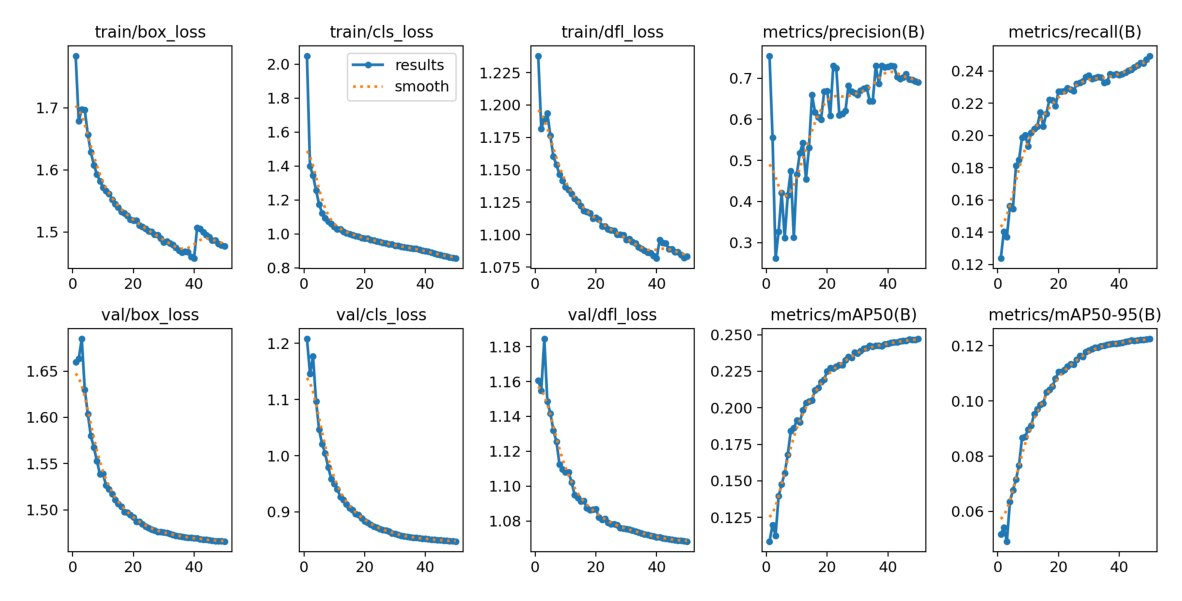

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 학습 결과 폴더 경로 (name='v11_baseline' 설정 기준)
results_dir = '/content/BDD100K_Night/v11_baseline'

# 1. 학습 곡선 확인 (Loss, mAP 등)
if os.path.exists(f'{results_dir}/results.png'):
    img = mpimg.imread(f'{results_dir}/results.png')
    plt.figure(figsize=(15, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("아직 학습 결과 그래프가 생성되지 않았습니다.")


0: 640x640 9 cars, 1 tl_red, 30.4ms
1: 640x640 11 cars, 4 tl_greens, 2 tl_nones, 3 tl_reds, 30.4ms
2: 640x640 11 cars, 1 tl_green, 1 tl_red, 30.4ms
Speed: 1.6ms preprocess, 30.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


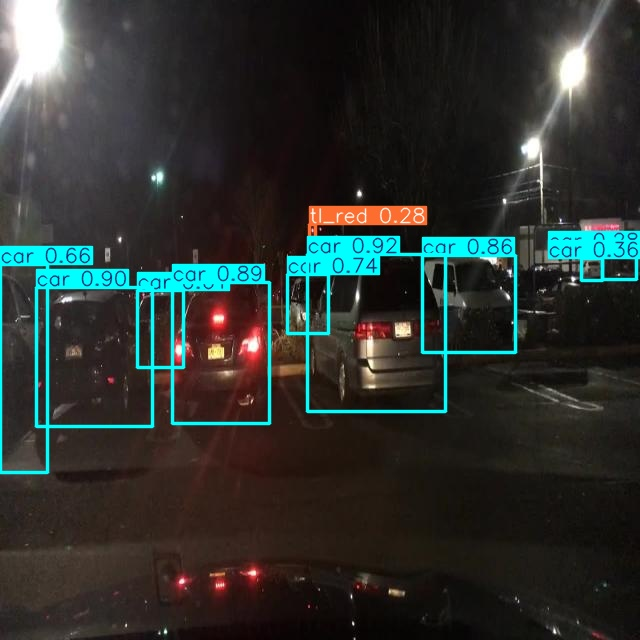

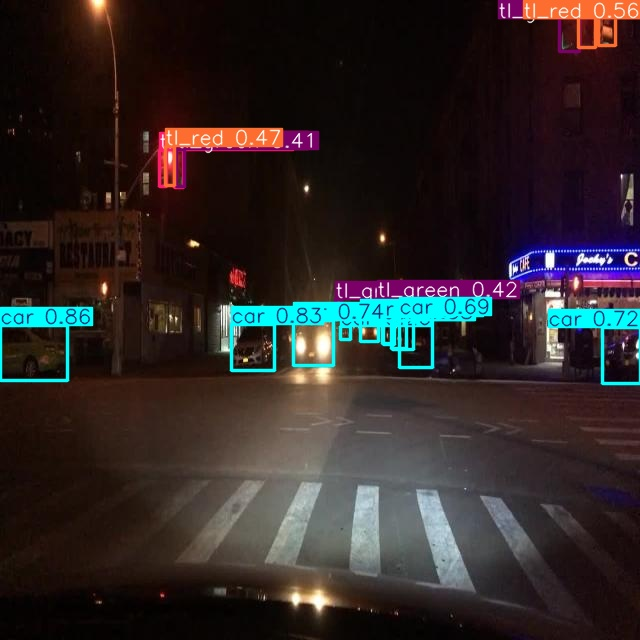

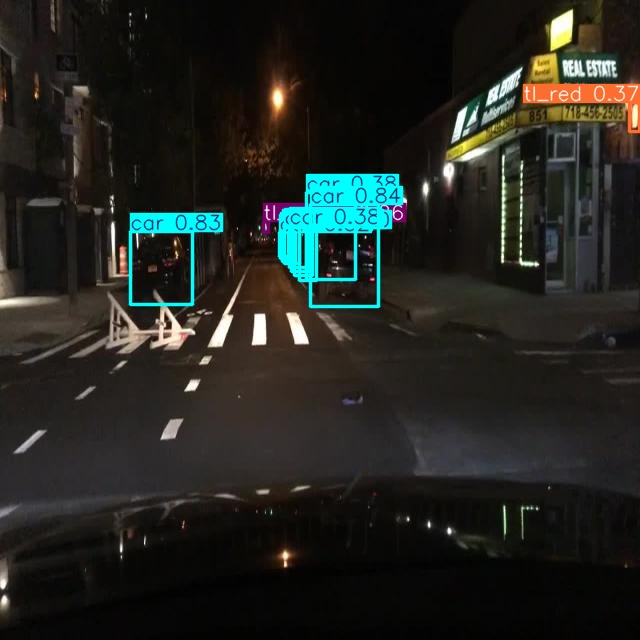

In [ ]:
# 가장 성적이 좋았던 가중치(best.pt) 불러오기
best_model = YOLO(f'{results_dir}/weights/best.pt')

# 테스트 이미지 중 3장만 골라서 확인
test_images_path = '/content/datasets/test/images'
sample_images = [os.path.join(test_images_path, f) for f in os.listdir(test_images_path)[:3]]

results = best_model.predict(source=sample_images, save=True, conf=0.25)

# 결과 이미지 시각화
from google.colab.patches import cv2_imshow
import cv2

# 최근 저장된 예측 결과 폴더 찾기
latest_predict_dir = max([os.path.join('/content/runs/detect', d) for d in os.listdir('/content/runs/detect') if 'predict' in d], key=os.path.getmtime)

for img_name in os.listdir(latest_predict_dir):
    img = cv2.imread(os.path.join(latest_predict_dir, img_name))
    cv2_imshow(img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 드라이브에 프로젝트 폴더 생성
save_path = '/content/drive/MyDrive/BDD100K_Night_Project/weights'
os.makedirs(save_path, exist_ok=True)

# 학습된 모델 파일 복사
shutil.copy(f'{results_dir}/weights/best.pt', f'{save_path}/v11_baseline_best.pt')
shutil.copy(f'{results_dir}/results.csv', f'{save_path}/v11_baseline_results.csv')

print(f"✅ 모델과 결과 파일이 구글 드라이브에 저장되었습니다: {save_path}")

Mounted at /content/drive
✅ 모델과 결과 파일이 구글 드라이브에 저장되었습니다: /content/drive/MyDrive/BDD100K_Night_Project/weights
